In [34]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import Precision, Recall
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score



import thu viện cần dùng 

In [35]:
df = pd.read_csv('process_data.csv')
X = df.drop(columns=['Class'])
y = df['Class']

In [36]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)


In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val =  scaler.transform(X_val)
y_train = np.array(y_train)

class_weights = class_weight.compute_class_weight('balanced', classes=np.array([0, 1]), y=y_train)
class_weights_dict = {0: class_weights[0], 1: 50}
print("Class weights dictionary:", class_weights_dict)
print("Unique labels in y_train:", np.unique(y_val))

Class weights dictionary: {0: 0.5009263222076955, 1: 50}
Unique labels in y_train: [0 1]


In [38]:
model = models.Sequential([
    layers.Dense((int(X_train.shape[1]/4)), activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(int(X_train.shape[1]/9), activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Biên dịch mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall()])

# Huấn luyện mô hình với class weights
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=33,
    validation_data=(X_val, y_val),class_weight = class_weights_dict
)

# Đánh giá mô hình trên tập test
results = model.evaluate(X_val, y_val)
print(f"CV Accuracy: {results[1]:.4f}")
print(f"CV Precision: {results[2]:.4f}")
print(f"CV Recall: {results[3]:.4f}")

/home/bangchi/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
5179/5179 ━━━━━━━━━━━━━━━━━━━━ 4s 703us/step - accuracy: 0.9038 - loss: 0.3036 - precision_4: 0.0241 - recall_4: 0.6108 - val_accuracy: 0.9946 - val_loss: 0.0333 - val_precision_4: 0.1811 - val_recall_4: 0.8333
Epoch 2/20
5179/5179 ━━━━━━━━━━━━━━━━━━━━ 3s 653us/step - accuracy: 0.9936 - loss: 0.0518 - precision_4: 0.2057 - recall_4: 0.8384 - val_accuracy: 0.9961 - val_loss: 0.0275 - val_precision_4: 0.2390 - val_recall_4: 0.8333
Epoch 3/20
5179/5179 ━━━━━━━━━━━━━━━━━━━━ 3s 622us/step - accuracy: 0.9963 - loss: 0.0451 - precision_4: 0.3007 - recall_4: 0.8541 - val_accuracy: 0.9961 - val_loss: 0.0248 - val_precision_4: 0.2390 - val_recall_4: 0.8333
Epoch 4/20
5179/5179 ━━━━━━━━━━━━━━━━━━━━ 3s 621us/step - accuracy: 0.9948 - loss: 0.0486 - precision_4: 0.2543 - recall_4: 0.8634 - val_accuracy: 0.9981 - val_loss: 0.0176 - val_precision_4: 0.4103 - val_recall_4: 0.8205
Epoch 5/20
5179/5179 ━━━━━━━━━━━━━━━━━━━━ 3s 643us/step - accuracy: 0.9970 - loss: 0.0319 - precision_4: 0.3517 

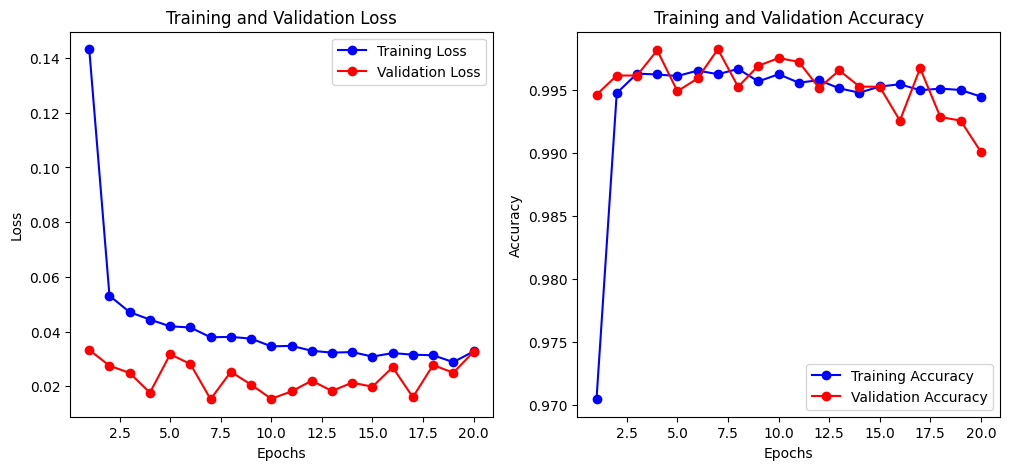

In [39]:
history_dict = history.history


train_loss = history_dict['loss']
val_loss = history_dict['val_loss']

train_acc = history_dict.get('accuracy')
val_acc = history_dict.get('val_accuracy')

epochs = range(1, len(train_loss) + 1)


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Learning Curve - Accuracy
if train_acc and val_acc:
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

plt.show()

In [43]:
y_pred_prob = model.predict(X_test)

# Bước 3: Chọn ngưỡng tùy chỉnh và chuyển đổi thành nhãn dự đoán
threshold = 0.96 # Ví dụ ngưỡng tùy chỉnh là 0.4
y_pred = (y_pred_prob > threshold).astype(int)


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Threshold: {threshold}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 363us/step
Threshold: 0.96
Precision: 0.7822
Recall: 0.8061
F1 Score: 0.7940
Accuracy: 0.9993
